# Introducing gower Package

Today I am so pleased to introduce my first PyPI package (so much easier to submit comparing to CRAN) --- gower for calculating gower distance. I borrowed ideas from https://github.com/scikit-learn/scikit-learn/issues/5884 nad hopefully it can be added to `sklearn` soon. There are lots of packages in R that incorporated this method but unfortunately not for Python users. I took this chance to try the whole package-making experience for PyPI and here we go!


## What is gower distance?

Like normal Euclidean distance or cosine distance, Gower distance is a distance measure. However, it can be used to calculate distance between two entity whose attribute has a mixed of categorical and numerical values. Why this is important? Many common clustering algorithms, e.g. K-means clustering - only works when all variables are numeric. [Gower (1971) A general coefficient of similarity and some of its properties. Biometrics 27 857–874.](https://www.jstor.org/stable/2528823?seq=1) 

I won't talk about the math behind it here but if you are interested there are tons of good material out there besides of Gower's original paper.:
* https://rstudio-pubs-static.s3.amazonaws.com/423873_adfdb38bce8d47579f6dc916dd67ae75.html#fnref2
* https://towardsdatascience.com/clustering-on-mixed-type-data-8bbd0a2569c3
* https://www.math.vu.nl/~sbhulai/papers/thesis-vandenhoven.pdf

## Installation

`pip install gower`

## Calculate Gower Distance

In [10]:
import numpy as np
import pandas as pd

Xd=pd.DataFrame({'age':[21,21,19, 30,21,21,19,30],
'gender':['M','M','M','M','F','F','F','F'],
'civil_status':['MARRIED','SINGLE','SINGLE','SINGLE','MARRIED','SINGLE','WIDOW','DIVORCED'],
'salary':[3000.0,1200.0 ,32000.0,1800.0 ,2900.0 ,1100.0 ,10000.0,1500.0],
'has_children':[1,0,1,1,1,0,0,1],
'available_credit':[2200,100,22000,1100,2000,100,6000,2200]})
Yd = Xd.iloc[0:1,:]

First create some fake data calld `Xd` and `Yd` as pandas dataframe:

In [11]:
Xd

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200
1,21,M,SINGLE,1200.0,0,100
2,19,M,SINGLE,32000.0,1,22000
3,30,M,SINGLE,1800.0,1,1100
4,21,F,MARRIED,2900.0,1,2000
5,21,F,SINGLE,1100.0,0,100
6,19,F,WIDOW,10000.0,0,6000
7,30,F,DIVORCED,1500.0,1,2200


In [12]:
Yd

,age,gender,civil_status,salary,has_children,available_credit
0,21,M,MARRIED,3000.0,1,2200


### Compuate distance matrix

Main function for the package is `gower.gower_matrix()`. This function has 4 arguments:

* `data_x` : input data
* `data_y` : default `None`
* `weight` : weight of each variable, default to be a vector of 1
* `cat_features` : a boolean vector indicates categorical features, default `None` and function will determin by itself

Let's run it on our dataframe `Xd`

In [5]:
import gower

gower.gower_matrix(Xd)

array([[0.        , 0.3590238 , 0.5040732 , 0.31787416, 0.16872811,
        0.52622986, 0.59697855, 0.47778758],
       [0.3590238 , 0.        , 0.52976364, 0.3138769 , 0.523629  ,
        0.16720603, 0.45600235, 0.6539635 ],
       [0.5040732 , 0.52976364, 0.        , 0.48861402, 0.6728013 ,
        0.6969697 , 0.740428  , 0.8151941 ],
       [0.31787416, 0.3138769 , 0.48861402, 0.        , 0.4824794 ,
        0.48108295, 0.74818605, 0.34332284],
       [0.16872811, 0.523629  , 0.6728013 , 0.4824794 , 0.        ,
        0.35750175, 0.43237334, 0.3121036 ],
       [0.52622986, 0.16720603, 0.6969697 , 0.48108295, 0.35750175,
        0.        , 0.2898751 , 0.4878362 ],
       [0.59697855, 0.45600235, 0.740428  , 0.74818605, 0.43237334,
        0.2898751 , 0.        , 0.57476616],
       [0.47778758, 0.6539635 , 0.8151941 , 0.34332284, 0.3121036 ,
        0.4878362 , 0.57476616, 0.        ]], dtype=float32)

Let's try to treat them all as categorical features:

In [15]:
gower.gower_matrix(Xd, cat_features = [True, True,True,True,True,True])

array([[0.        , 0.6666667 , 0.6666667 , 0.6666667 , 0.5       ,
        0.8333333 , 1.        , 0.6666667 ],
       [0.6666667 , 0.        , 0.6666667 , 0.6666667 , 0.8333333 ,
        0.33333334, 0.8333333 , 1.        ],
       [0.6666667 , 0.6666667 , 0.        , 0.5       , 0.8333333 ,
        0.8333333 , 0.8333333 , 0.8333333 ],
       [0.6666667 , 0.6666667 , 0.5       , 0.        , 0.8333333 ,
        0.8333333 , 1.        , 0.6666667 ],
       [0.5       , 0.8333333 , 0.8333333 , 0.8333333 , 0.        ,
        0.6666667 , 0.8333333 , 0.6666667 ],
       [0.8333333 , 0.33333334, 0.8333333 , 0.8333333 , 0.6666667 ,
        0.        , 0.6666667 , 0.8333333 ],
       [1.        , 0.8333333 , 0.8333333 , 1.        , 0.8333333 ,
        0.6666667 , 0.        , 0.8333333 ],
       [0.6666667 , 1.        , 0.8333333 , 0.6666667 , 0.6666667 ,
        0.8333333 , 0.8333333 , 0.        ]], dtype=float32)

It also supports array inputs:

In [14]:
X = np.asarray(Xd)
gower.gower_matrix(X)

array([[0.        , 0.3590238 , 0.5040732 , 0.31787416, 0.16872811,
        0.52622986, 0.59697855, 0.47778758],
       [0.3590238 , 0.        , 0.52976364, 0.3138769 , 0.523629  ,
        0.16720603, 0.45600235, 0.6539635 ],
       [0.5040732 , 0.52976364, 0.        , 0.48861402, 0.6728013 ,
        0.6969697 , 0.740428  , 0.8151941 ],
       [0.31787416, 0.3138769 , 0.48861402, 0.        , 0.4824794 ,
        0.48108295, 0.74818605, 0.34332284],
       [0.16872811, 0.523629  , 0.6728013 , 0.4824794 , 0.        ,
        0.35750175, 0.43237334, 0.3121036 ],
       [0.52622986, 0.16720603, 0.6969697 , 0.48108295, 0.35750175,
        0.        , 0.2898751 , 0.4878362 ],
       [0.59697855, 0.45600235, 0.740428  , 0.74818605, 0.43237334,
        0.2898751 , 0.        , 0.57476616],
       [0.47778758, 0.6539635 , 0.8151941 , 0.34332284, 0.3121036 ,
        0.4878362 , 0.57476616, 0.        ]], dtype=float32)

### Find top n similar items

One intuition for me to create this package is to use it at work. I usually need to find look-alike customer for my company. E.g. one customer with certain KPI and properties --- location, tenure, RFM metrics etc and they are often mixed type. Gower distance can easily be calculated the distance between them and allows me to give certain variables higher/lower weight.

In [9]:
gower.gower_topn(Xd.iloc[0:1,:], Xd, n = 5)

{'index': array([0, 4, 3, 1, 7]),
 'values': array([0.        , 0.16872811, 0.31787416, 0.3590238 , 0.47778758],
       dtype=float32)}

The function will return two arrays. The index of the top 5 closest records and their distance in decimals

## Application in Hierarchical Clustering

The most popular usecases for mathematical distances are clustering. `cluster` module in `scipy` provided the ability to use custom distance matrix to do hierarchical clustering. Let's run a simple clustering model on our toy data. First we need to create the linkage using our precomputed distance matrix:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

dm = gower.gower_matrix(X)
Zd = linkage(dm) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


Say we want total of 3 clusters:

In [22]:
cld = fcluster(Zd, 3, criterion='maxclust')
cld

array([2, 1, 3, 2, 2, 1, 1, 2], dtype=int32)

We can also inspect the dendrogram created from our distance matrix: 

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [22.5, 22.5, 53.75, 53.75],
  [5.0, 5.0, 38.125, 38.125]],
 'dcoord': [[0.0, 0.47178821309917673, 0.47178821309917673, 0.0],
  [0.0, 0.5855417071567129, 0.5855417071567129, 0.47178821309917673],
  [0.0, 0.47181830528906626, 0.47181830528906626, 0.0],
  [0.0, 0.5880372297739299, 0.5880372297739299, 0.47181830528906626],
  [0.0, 0.6198589998278438, 0.6198589998278438, 0.5880372297739299],
  [0.5855417071567129,
   0.6946257542922052,
   0.6946257542922052,
   0.6198589998278438],
  [0.0, 0.9296863213402743, 0.9296863213402743, 0.6946257542922052]],
 'ivl': ['2', '6', '1', '5', '7', '3', '0', '4'],
 'leaves': [2, 6, 1, 5, 7, 3, 0, 4],
 'color_list': ['g', 'g', 'r', 'r', 'r', 'b', 'b']}

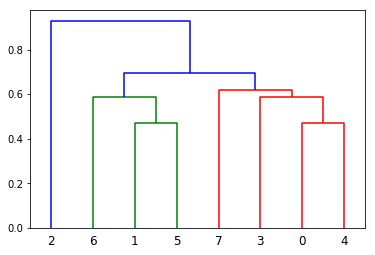

In [23]:
dendrogram(Zd) 

So that is for now, Please feel free to report bug and issues here: (https://github.com/wwwjk366/teamr/issues)